In [54]:
import torch
import numpy as np
from sklearn.manifold import TSNE

In [55]:
GloVe = {}
with open("glove.6B/glove.6B.100d.txt", "r", encoding="utf-8") as vector_file:
    for line in vector_file:
        line_content = line.split()
        word = line_content[0]
        # There's probably a better way to read strings into a FloatTensor
        word_vec = torch.from_numpy(np.asarray(line_content[1:], "float32"))
        GloVe[word] = word_vec

In [56]:
import csv
word_bank = []
with open('bad_words.csv') as bad_words_csv:
    word_bank = list(csv.reader(bad_words_csv, delimiter=","))[0]
print(word_bank)

['anal', 'anus', 'arse', 'ass', 'ass fuck', 'ass hole', 'assfucker', 'asshole', 'assshole', 'bastard', 'bitch', 'black cock', 'bloody hell', 'boong', 'cock', 'cockfucker', 'cocksuck', 'cocksucker', 'coon', 'coonnass', 'crap', 'cunt', 'cyberfuck', 'damn', 'darn', 'dick', 'dirty', 'douche', 'dummy', 'erect', 'erection', 'erotic', 'escort', 'fag', 'faggot', 'fuck', 'fuck off', 'fuck you', 'fuckass', 'fuckhole', 'god damn', 'gook', 'hard core', 'hardcore', 'homoerotic', 'hore', 'lesbian', 'lesbians', 'mother fucker', 'motherfuck', 'motherfucker', 'negro', 'nigger', 'orgasim', 'orgasm', 'penis', 'penisfucker', 'piss', 'piss off', 'porn', 'porno', 'pornography', 'pussy', 'retard', 'sadist', 'sex', 'sexy', 'shit', 'slut', 'son of a bitch', 'suck', 'tits', 'viagra', 'whore', 'xxx']


In [57]:
num_words = 0
final_word_bank = []
for word in word_bank:
    word = word.lower()
    if word in GloVe:
        final_word_bank.append(word)
        
        
analyze_words = ['rich', 'breast', 'butt', 'balls']
colors = ['blue' for word in final_word_bank]
colors += ['red' for word in analyze_words]
#print(colors)
final_word_bank += analyze_words



wb_embeddings = torch.zeros((len(final_word_bank), 100))

for i, word in enumerate(final_word_bank):
    #print(word)
    if word.lower() in GloVe:
        wb_embeddings[i] = GloVe[word.lower()]
        

In [58]:
low_dim_wb = TSNE(n_components=2, 
                  learning_rate='auto',
                  init='random', 
                  perplexity=3).fit_transform(wb_embeddings)

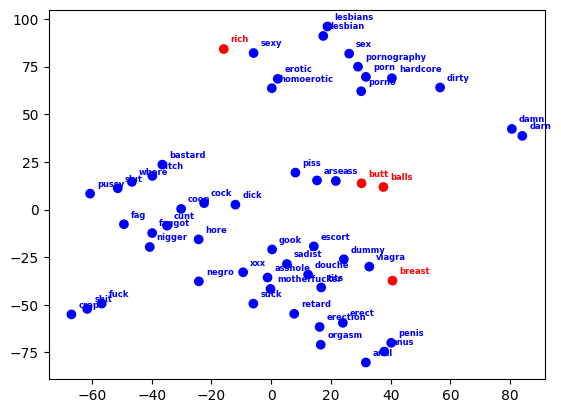

In [61]:
import matplotlib.pyplot as plt
plt.scatter(low_dim_wb[:,0], low_dim_wb[:,1], color=colors)
#plt.annotate()

num_analyze = len(analyze_words)
for c, label, x, y in zip(colors, final_word_bank[:], low_dim_wb[:, 0], low_dim_wb[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(5, 5), textcoords="offset points", fontsize=6, color=c, fontweight='bold')
    
